# Making a Pipeline with various models for breast cancer prediction

The data was extracted from kaggle in __[CancerData] (https://www.kaggle.com/datasets/erdemtaha/cancer-data?resource=download)__

### Basic information about the proyect: 
**Date:** _03 - 08 - 2024_ 

**Affiliation:** _Universidad Icesi_

**Course:** _Analisis Exploratorio de datos_ 

**Names:** _Juan Diego Guevara and Simon Garcia_ 

**Description**: The following proyect uses simple pipeline with the selected variables to make basic predicting models

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
# scoring data
from sklearn.metrics import accuracy_score


In [25]:

#The data set is uploaded
data = pd.read_csv("Cancer_Data.csv", header = 0)

#Codification of the "diagnosis"varibale so the models dont throw errors
data["diagnosis"] = data["diagnosis"].replace({"M":1,"B":0})

#dropping the first column, since patient ID doesnt do anything, and the empty colum Unnamed: 32
data = data.drop('id', axis=1)
data = data.drop('Unnamed: 32',axis=1)
data.head()

C:\Users\SIMON\AppData\Local\Temp\ipykernel_51204\1048944863.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["diagnosis"] = data["diagnosis"].replace({"M":1,"B":0})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


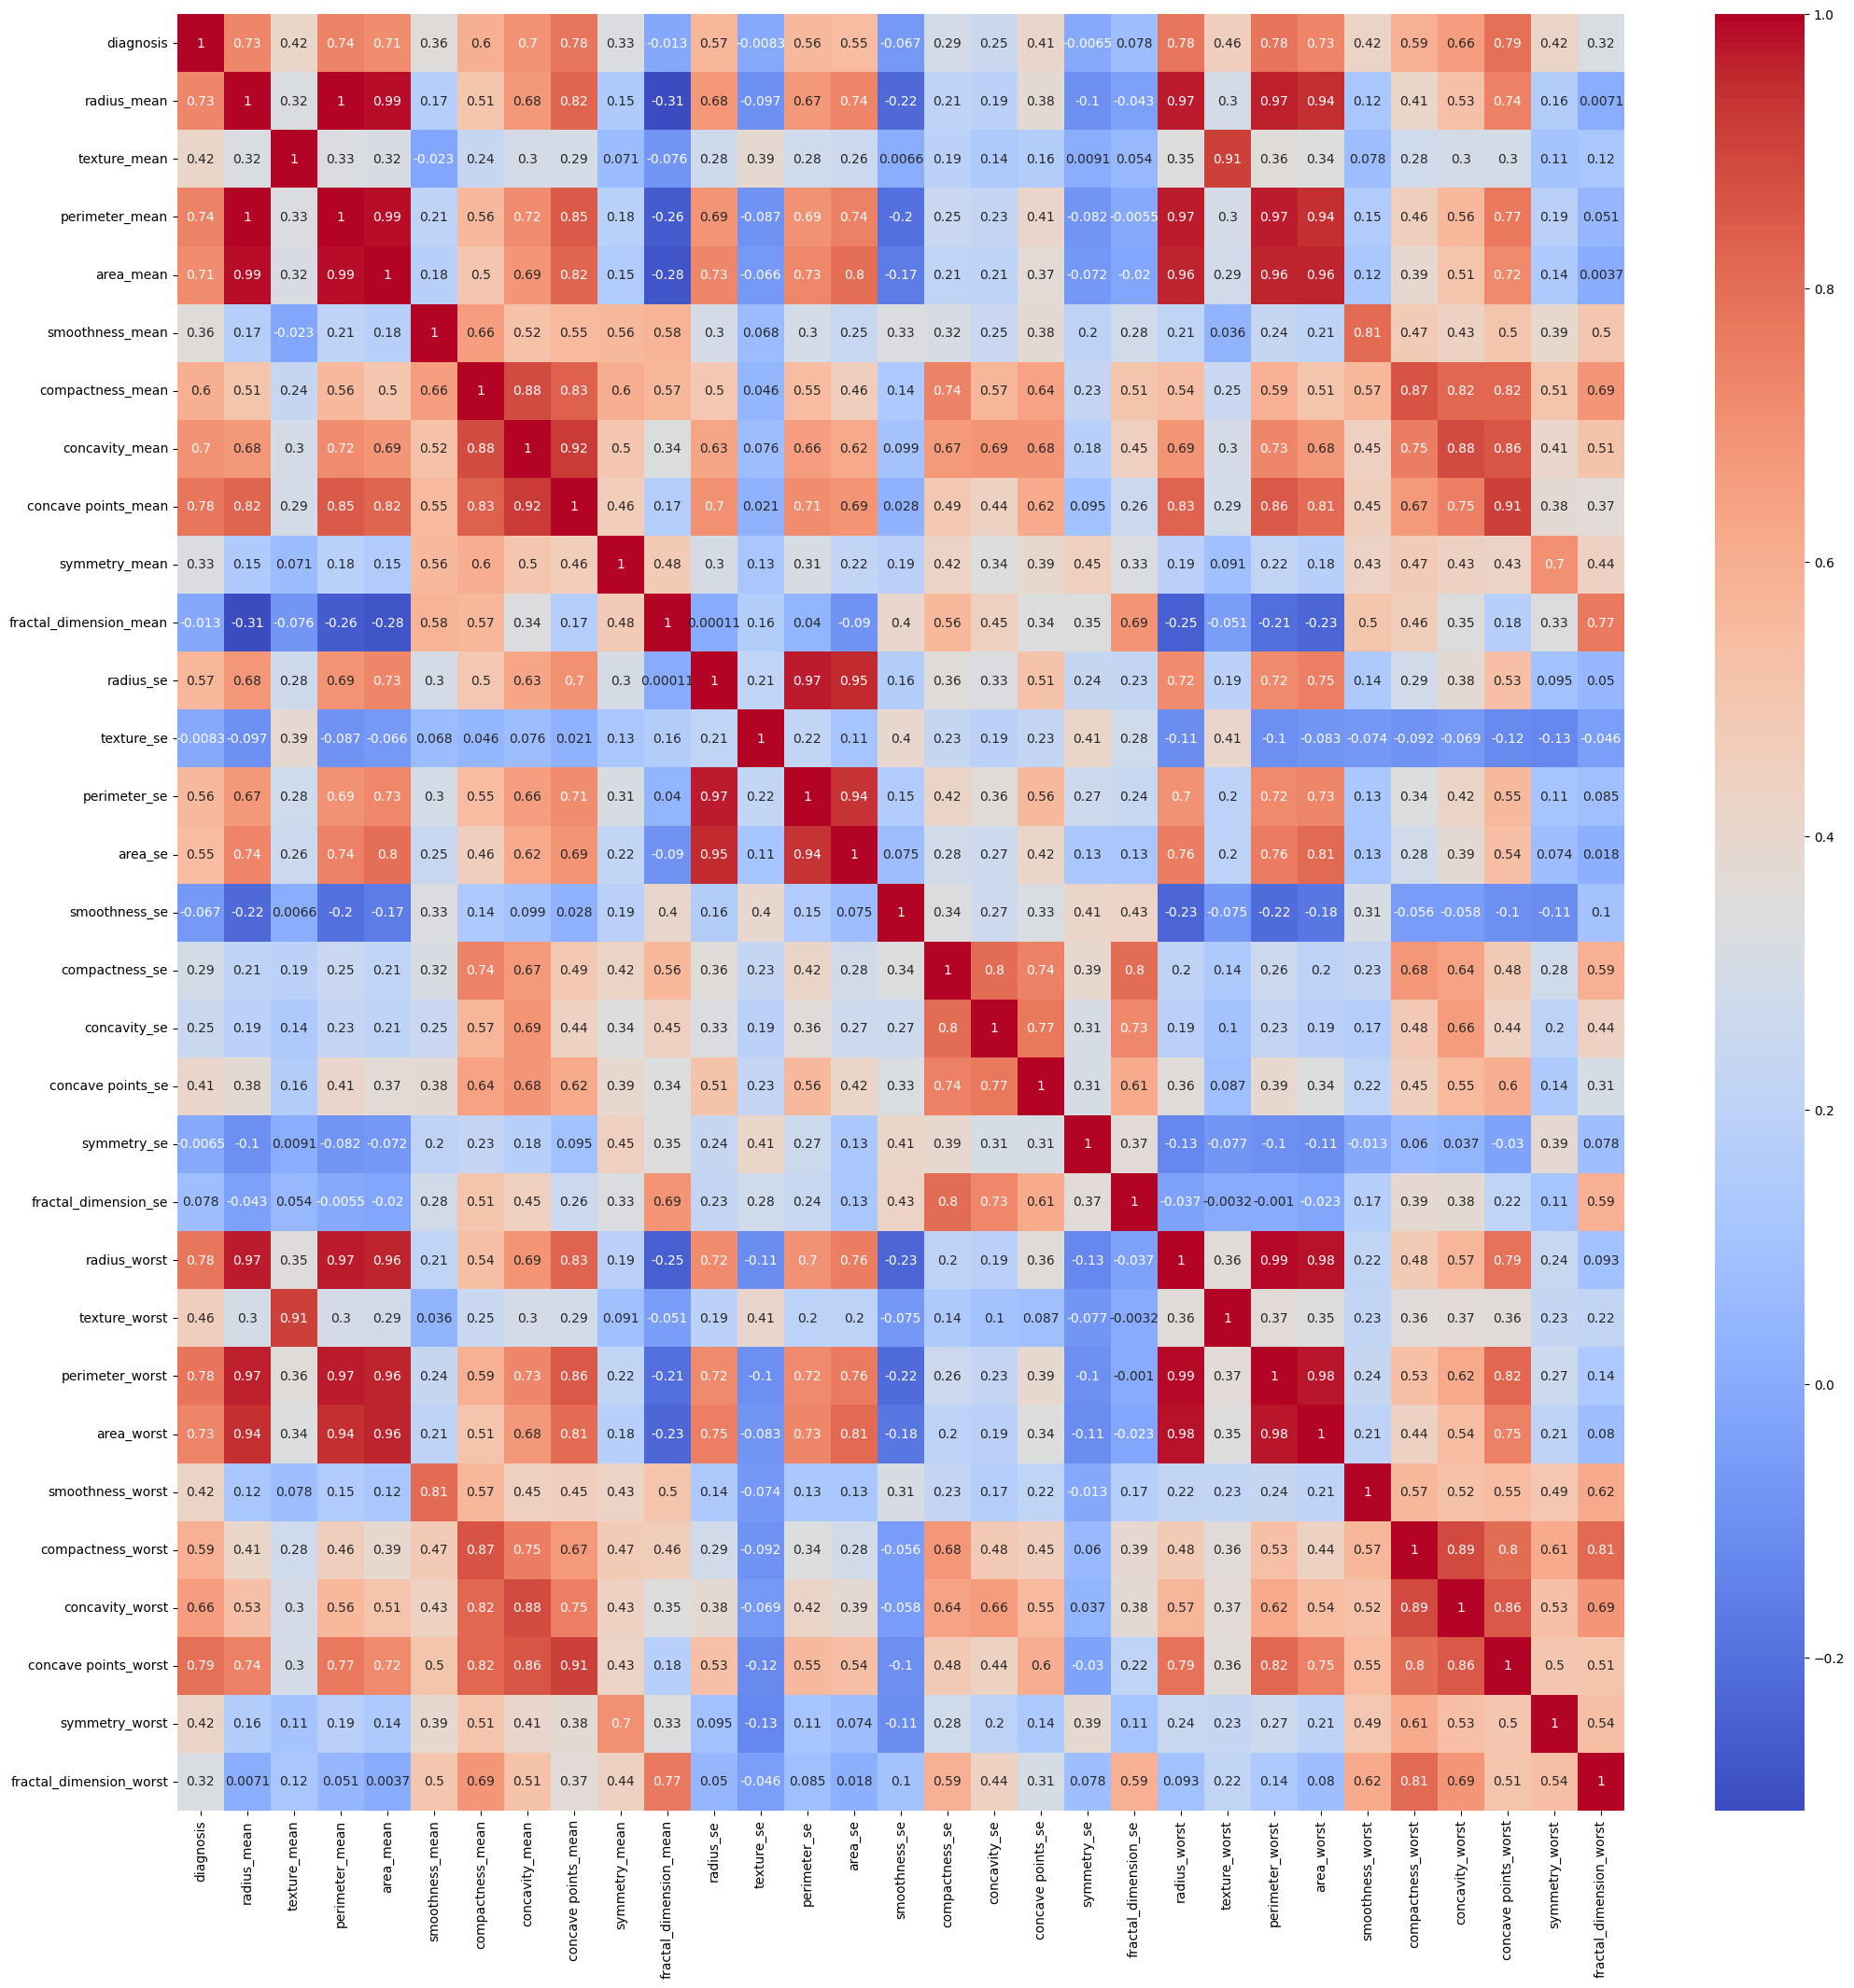

In [24]:
#Making a matrix of correlation to check which variables have the greatest linear correlation
#the prediction. After selecing a variable, we check for colinearity

matrix1 = data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(matrix1, cmap='coolwarm', annot=True)
# mostrar el mapa de calor
plt.show()

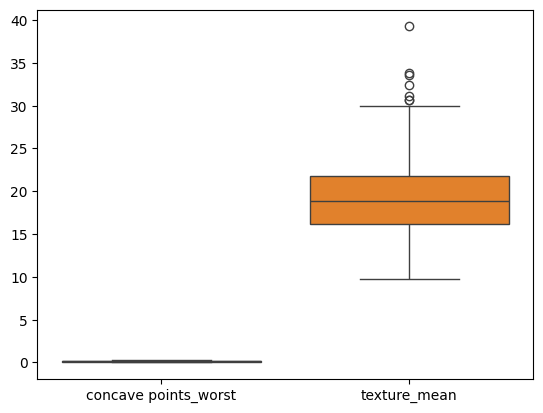

In [26]:
#Checking for outliers

outliersTest = data[["concave points_worst", "texture_mean"]]
# Creting a boxplot to check for outliers in both testing variables
sns.boxplot(outliersTest)

# show the graph
plt.show()

In [18]:
#Diagnosis is the y variable
#The chosen variables where concave point worst which had the highest match with diagnosis
#texture mean, did not have the best rate with dianogsis, but it wasnt closely realted to concave points

y = data['diagnosis']
X = data[["concave points_worst", "texture_mean"]]

In [19]:
#The data spliting is executed here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [40]:
#libraries used for the pipelines
# importing pipes for making the Pipe flow
from sklearn.pipeline import Pipeline

#Import to make accuracy test
from sklearn.metrics import accuracy_score

In [66]:
# The sequence of pipe flow is :
# Data gets scaled >> Classification of decission tree
#This pipeline takes care in normalizing the data before using the model
pipe = Pipeline([('pca', PCA(n_components = 2)),('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)
print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s
0.9157894736842105


In [38]:
pipe = Pipeline([('pca', PCA(n_components = 2)), ('decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

# scoring data
print(accuracy_score(y_test, pipe.predict(X_test)))

[Pipeline] ............... (step 1 of 2) Processing pca, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
0.9157894736842105


In [60]:
# The sequence of pipe flow is :
# Data gets scaled >> Classification of decission tree
pipe = Pipeline([('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

#Scoring data
print(accuracy_score(y_test, pipe.predict(X_test)))

#This pipeline does onle a little better than just running the model decision tree

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
0.9052631578947369


In [44]:
pipe = Pipeline([('decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

# scoring data
print(accuracy_score(y_test, pipe.predict(X_test)))

#This pipeline does the worst

[Pipeline] ..... (step 1 of 1) Processing decision_tree, total=   0.0s
0.9017543859649123


In [61]:
from sklearn.svm import SVC

#This pipeline scales and then applies SVC
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC())])

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

# scoring data
print(accuracy_score(y_test, pipe.predict(X_test)))

#This model does better than the decision tree in the same conditions

0.9298245614035088


In [68]:
from sklearn.svm import SVC

#This pipeline uses adjusts margins, then scales and then applies SVC
pipe = Pipeline([('pca', PCA(n_components = 2)), ('scaler', StandardScaler()),('svc', SVC())])

# fitting the data in the pipeline
pipe.fit(X_train, y_train)

# scoring data
print(accuracy_score(y_test, pipe.predict(X_test)))

#This model does the best out of all the other models

0.9333333333333333
